In [1]:
import torch

print(torch.cuda.is_available())

#train.py 실행 시 GPU 사용 여부 체크
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f'Training on GPU {torch.cuda.get_device_name(0)}')
else:
    device = torch.device("cpu")
    print('Training on CPU')


True
Training on GPU NVIDIA GeForce RTX 4070 Laptop GPU


In [2]:
# 데이터 전처리
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기
train_path = 'C:/000_SHCHOI/001_SeSAC/000_Offline/000_Data AI Developer/002_Portfolio(git)/004_Kaggle/002_Predicting Optimal Fertilizers/001_Dataset/train.csv'
train = pd.read_csv(train_path)

train.head()

# 1. id 컬럼 제거
df = train.drop('id', axis = 1)

# 2. 타겟 분리
y = df['Fertilizer Name']
x = df.drop('Fertilizer Name', axis = 1)

# 3. 범주형 변수 원-핫 인코딩
x = pd.get_dummies(x, columns=['Soil Type', 'Crop Type'])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

# 한글 폰트 경고 방지
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

train_path = 'C:/000_SHCHOI/001_SeSAC/000_Offline/000_Data AI Developer/002_Portfolio(git)/004_Kaggle/002_Predicting Optimal Fertilizers/002_Data Science/1st(250625)_ChatGPT/train_01.csv'
df = pd.read_csv(train_path)

df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]

# 1. 기초 분포
num_cols = ['temparature', 'humidity', 'moisture', 'nitrogen', 'potassium', 'phosphorous']

# 1-1. 수치형 변수 히스토그램
plt.figure(figsize = (16, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(x = df[col], bins = 30, kde = True)
    plt.title(f"{col} 분포")
plt.tight_layout()
plt.show()

# 1-2. 수치형 변수 박스플롯
plt.figure(figsize = (16, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f"{col} 박스플롯")
plt.tight_layout()
plt.show()

# 1-3. 타겟(비료명) 카운트플롯
plt.figure(figsize=(8, 4))
sns.countplot(x='fertilizer_name', data=df, order=df['fertilizer_name'].value_counts().index)
plt.title("비료명(타겟) 분포")
plt.xticks(rotation=45)
plt.show()

# 2. 타겟별 변수 분포 (박스플롯, 바이올린플롯)
plt.figure(figsize=(16, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='fertilizer_name', y=col, data=df)
    plt.title(f"{col} by Fertilizer")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.violinplot(x='fertilizer_name', y=col, data=df, inner='quartile')
    plt.title(f"{col} by Fertilizer")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. 변수간 상관계수 히트맵
plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("수치형 변수 상관관계")
plt.show()

# 3-2. 페어플롯 (표본 1000개만 사용)
sns.pairplot(df.sample(1000, random_state=1), hue='Fertilizer Name', vars=num_cols, diag_kind='kde')
plt.suptitle("수치형 변수 페어플롯", y=1.02)
plt.show()

# 4. Soil Type과 비료명 교차분석
soil_cols = [c for c in df.columns if c.startswith('Soil Type_')]
soil_long = df[soil_cols + ['fertilizer_name']].melt(id_vars='fertilizer_name', var_name='Soil Type', value_name='Value')
soil_long = soil_long[soil_long['Value'] == 1]
plt.figure(figsize=(10, 5))
sns.countplot(x='Soil Type', hue='fertilizer_name', data=soil_long)
plt.title('토양별 비료명 분포')
plt.xticks(rotation=45)
plt.show()

# 4-2. Crop Type과 비료명 교차분석
crop_cols = [c for c in df.columns if c.startswith('Crop Type_')]
crop_long = df[crop_cols + ['Fertilizer Name']].melt(id_vars='Fertilizer Name', var_name='Crop Type', value_name='Value')
crop_long = crop_long[crop_long['Value'] == 1]
plt.figure(figsize=(14, 6))
sns.countplot(x='Crop Type', hue='Fertilizer Name', data=crop_long)
plt.title('작물별 비료명 분포')
plt.xticks(rotation=45)
plt.show()

# 5. 다변량: PCA 2D 시각화 (수치형+원-핫)
X_data = df.drop('Fertilizer Name', axis=1)

for col in X_data.select_dtypes(include=['object']).columns:
    X_data[col] = X_data[col].astype('category').cat.codes

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_data)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Fertilizer Name'], alpha=0.3, s=10, palette='tab10')
plt.title("PCA 2D 변환: 비료명 별 분포")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

# 6. 파생변수 효과 (N+P+K 총합 분포, 비료별 boxplot)
df['NPK_sum'] = df['Nitrogen'] + df['Potassium'] + df['Phosphorous']
plt.figure(figsize=(6, 4))
sns.histplot(x = df['NPK_sum'], bins=30, kde=True)
plt.title("N+P+K 총합 분포")
plt.show()
plt.figure(figsize=(10, 5))
sns.boxplot(x='Fertilizer Name', y='NPK_sum', data=df)
plt.title("비료별 N+P+K 총합 분포")
plt.xticks(rotation=45)
plt.show()

# 8. 변수중요도 (랜덤포레스트)
rf = RandomForestClassifier(n_estimators=20, random_state=0)
rf.fit(X_data, df['Fertilizer Name'])
importances = pd.Series(rf.feature_importances_, index=X_data.columns)
importances.nlargest(10).sort_values().plot(kind='barh', figsize=(8,5))
plt.title("랜덤포레스트 변수중요도 (상위 10개)")
plt.show()

In [ ]:
print(df.columns.tolist())

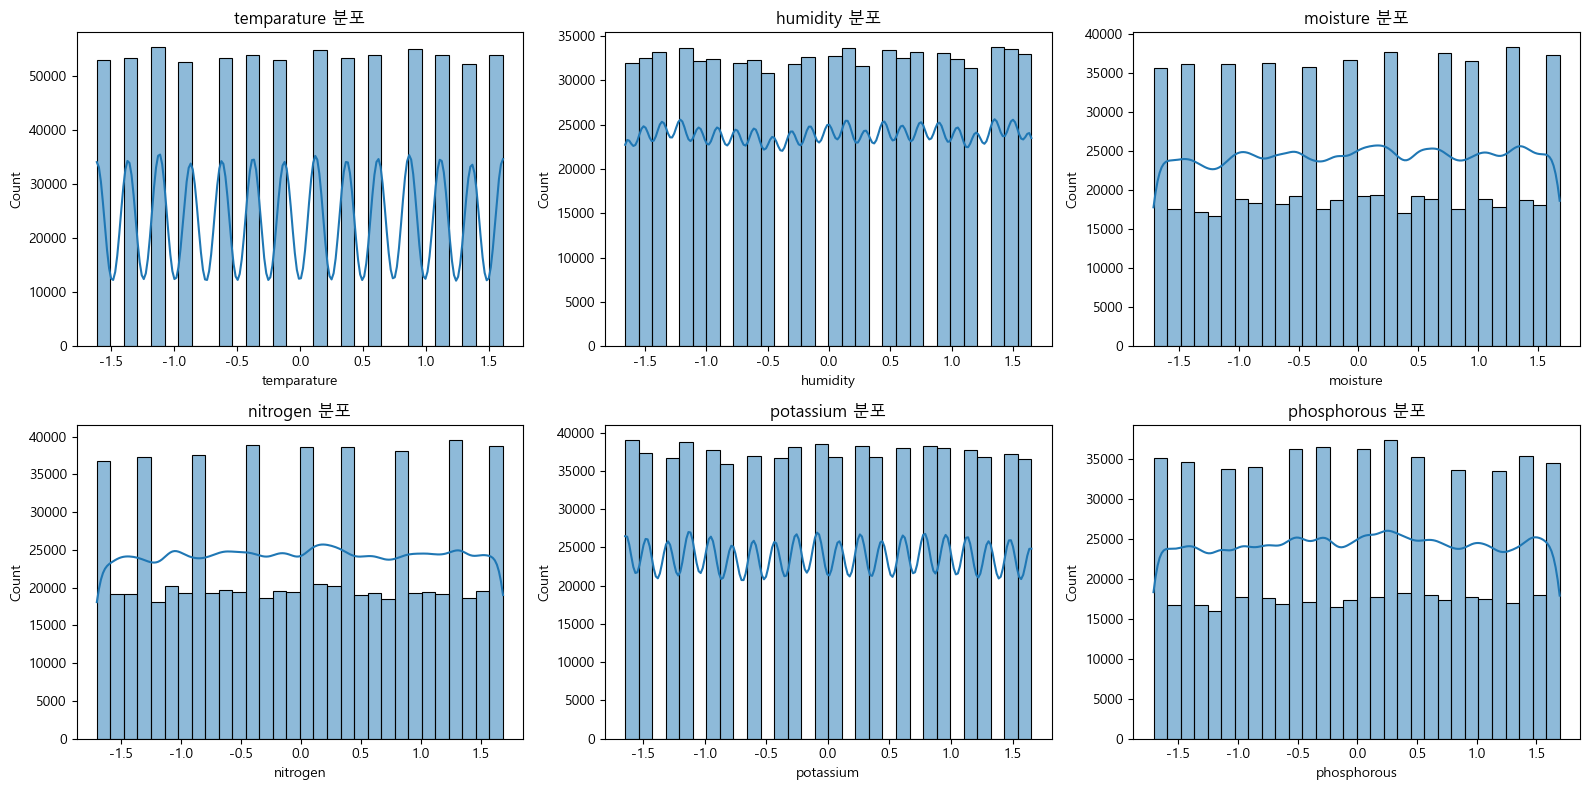

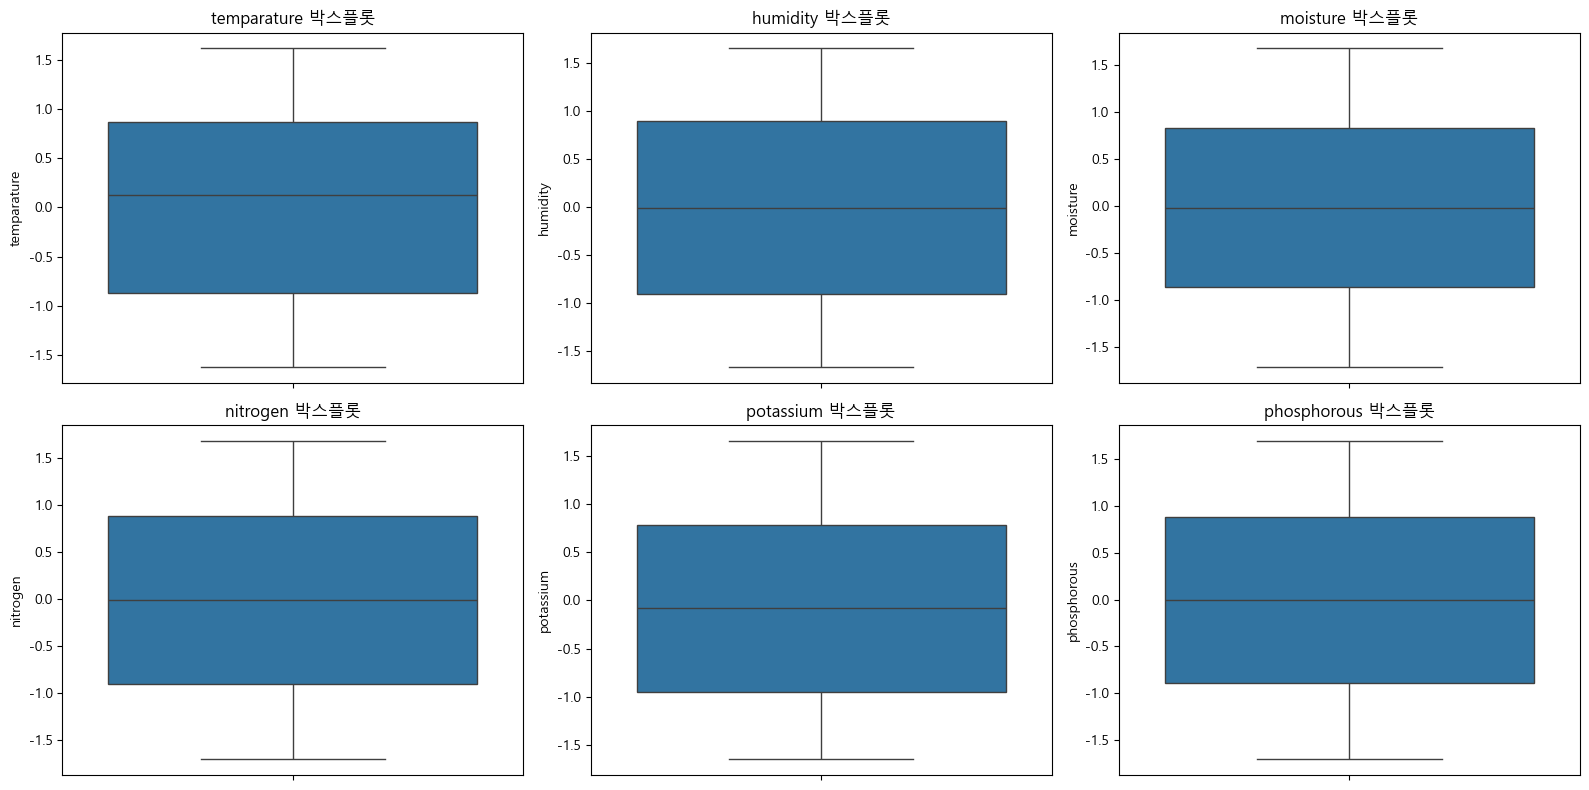

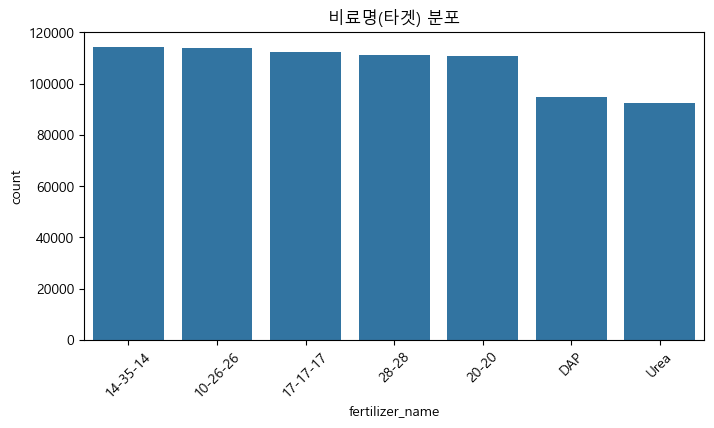

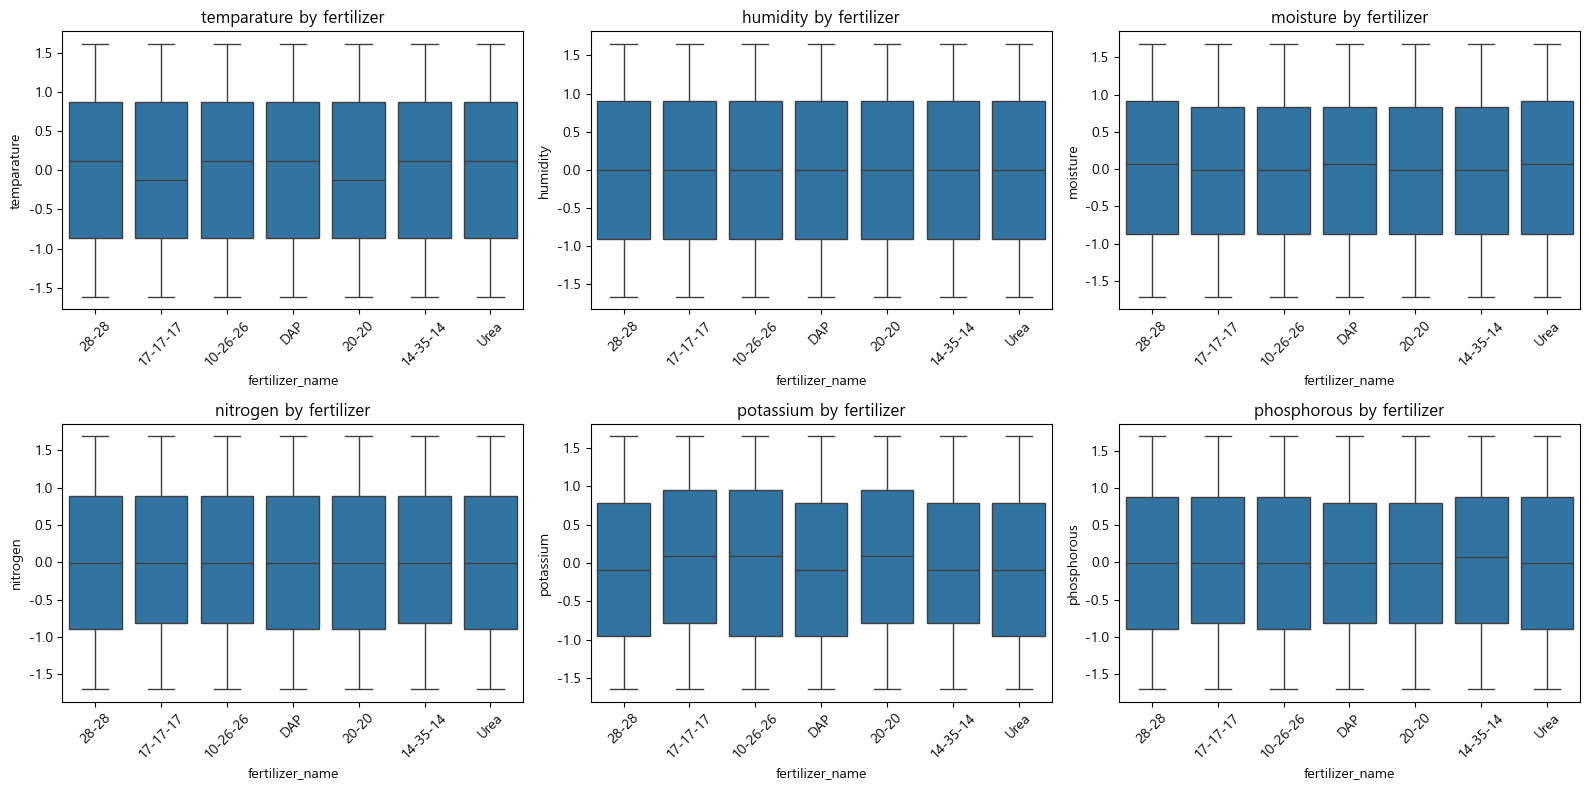

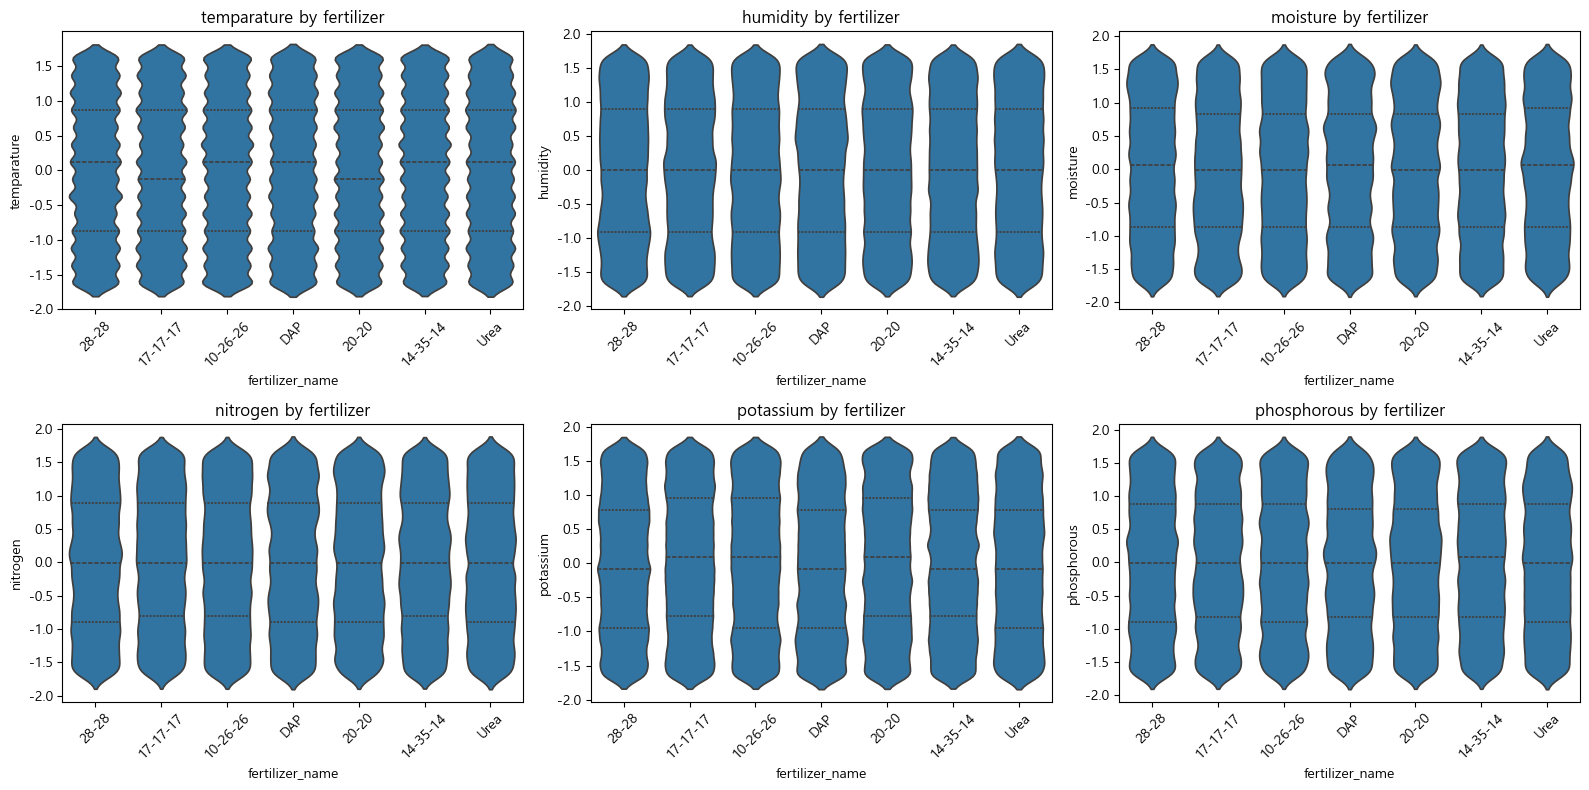

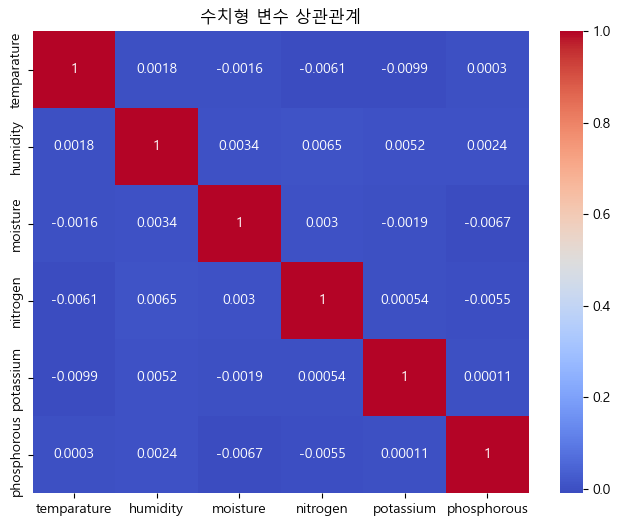

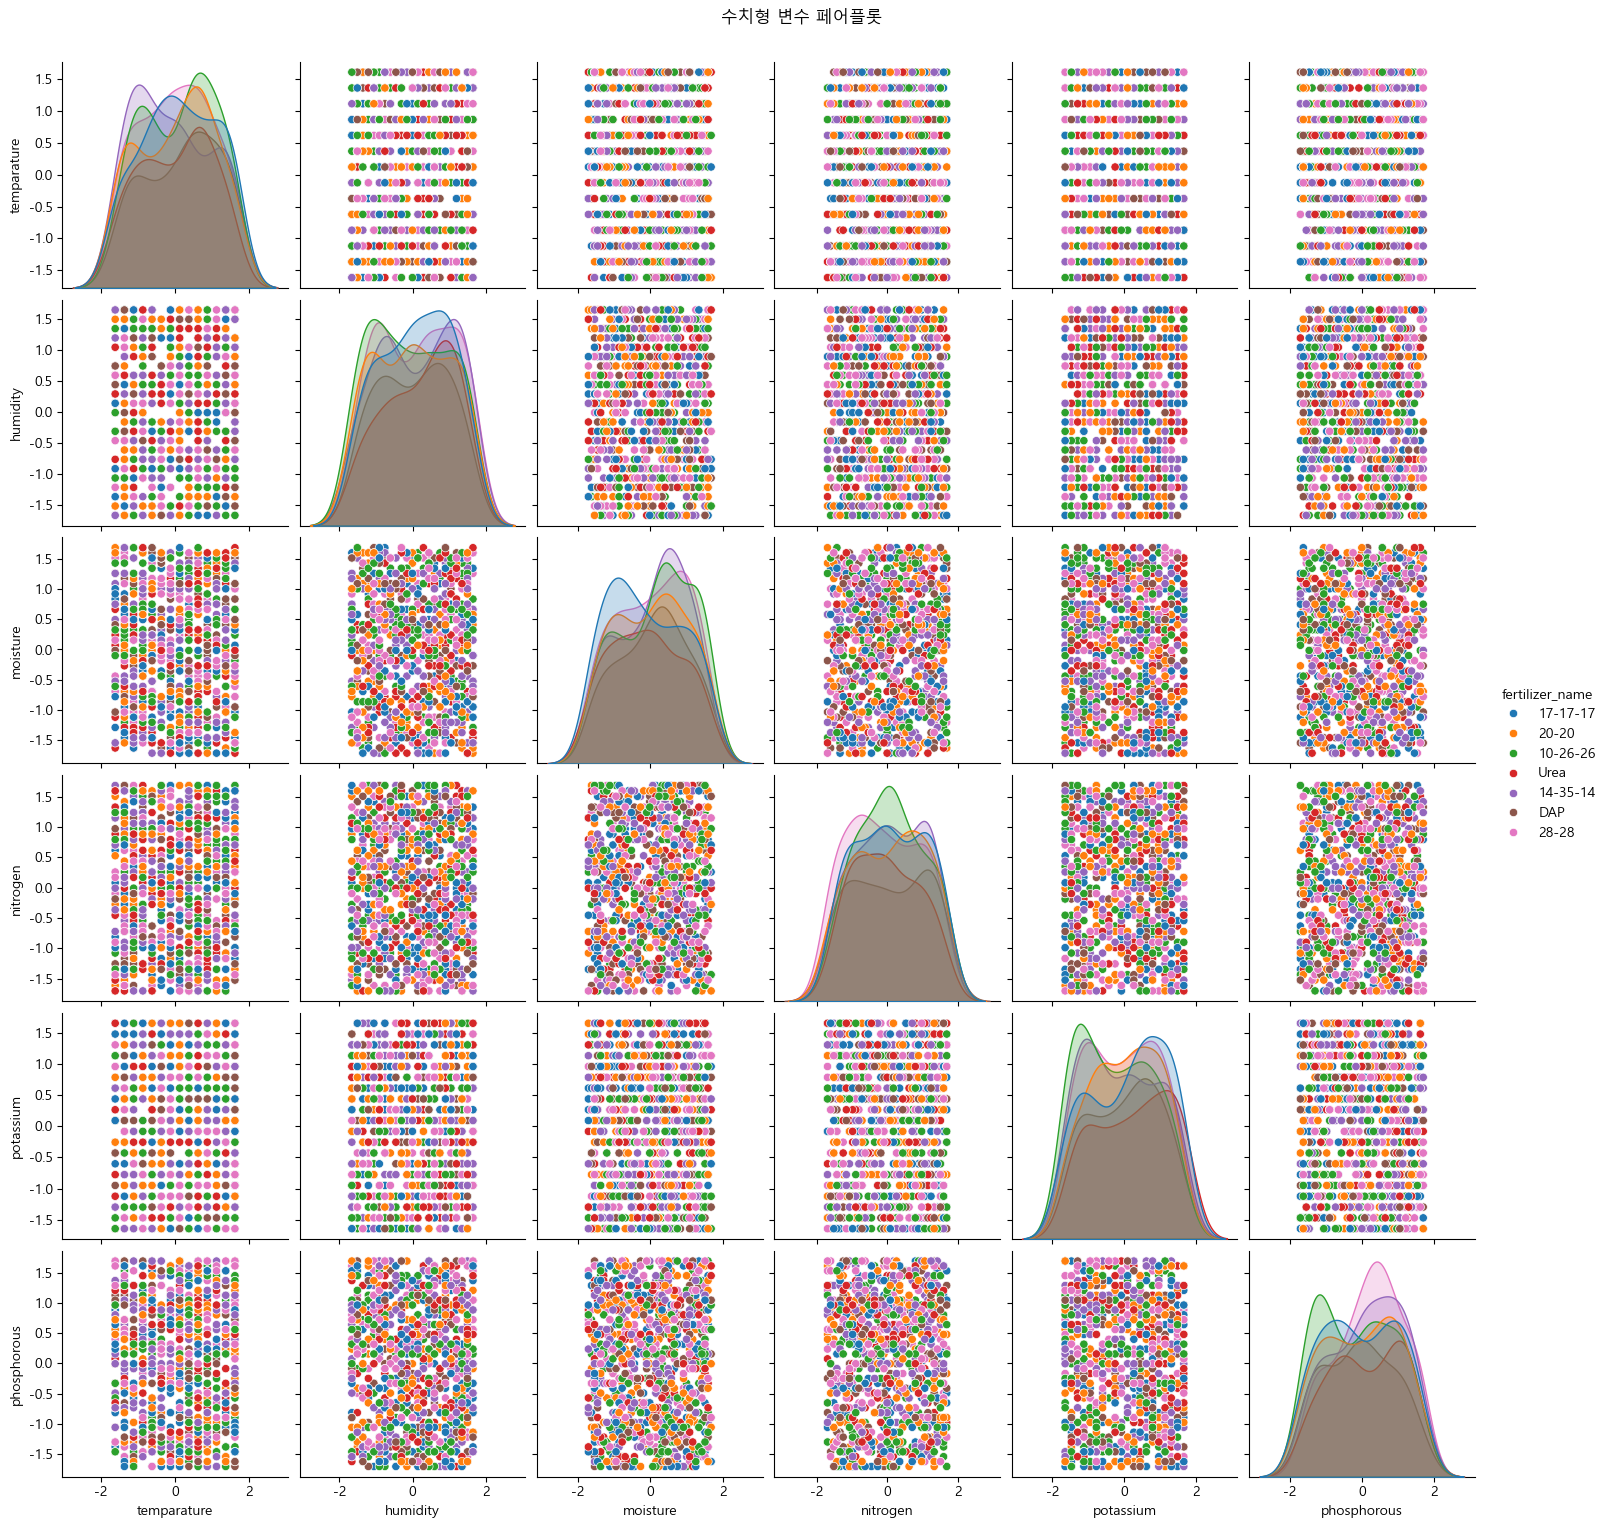

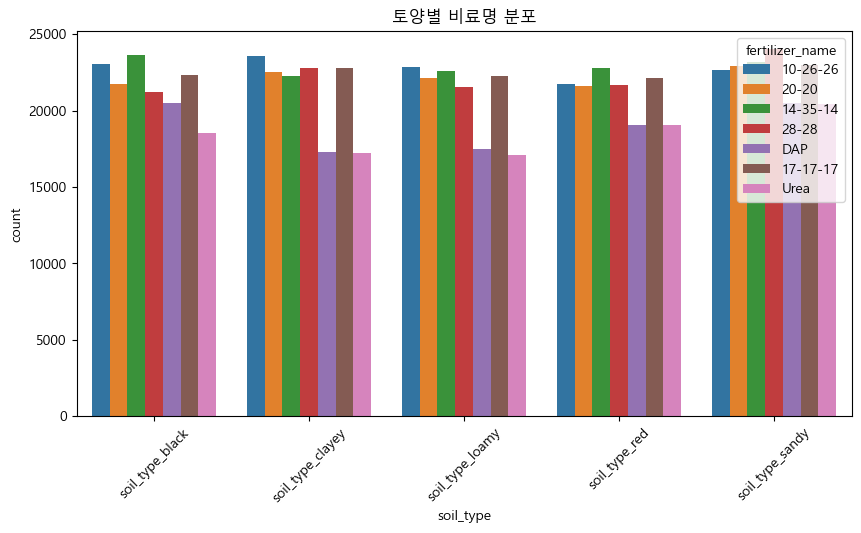

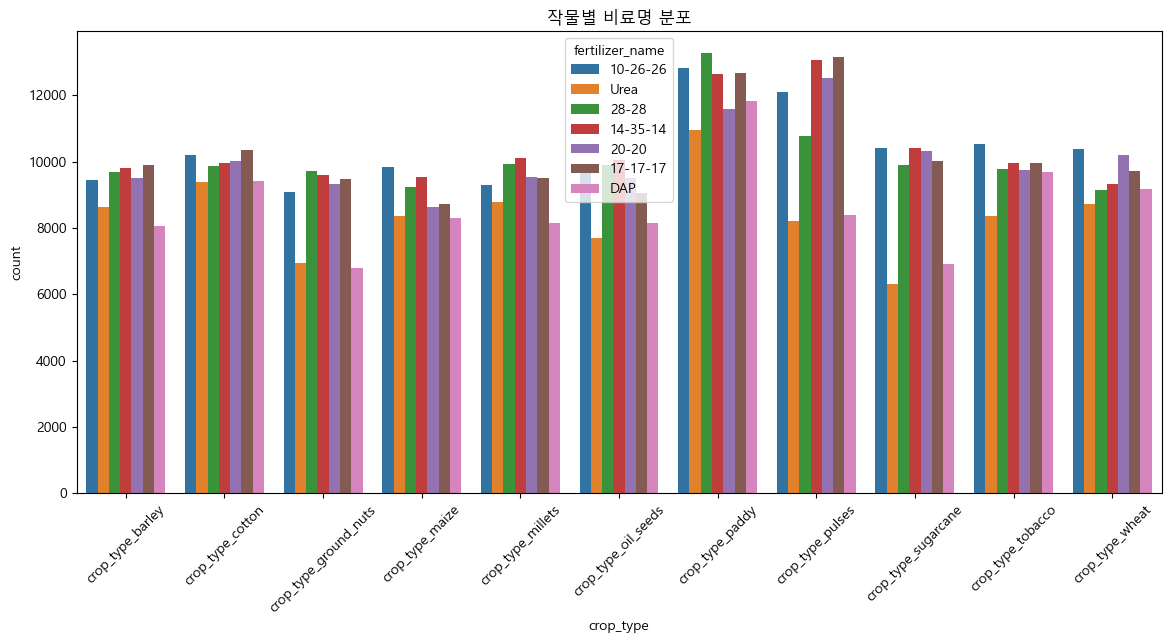

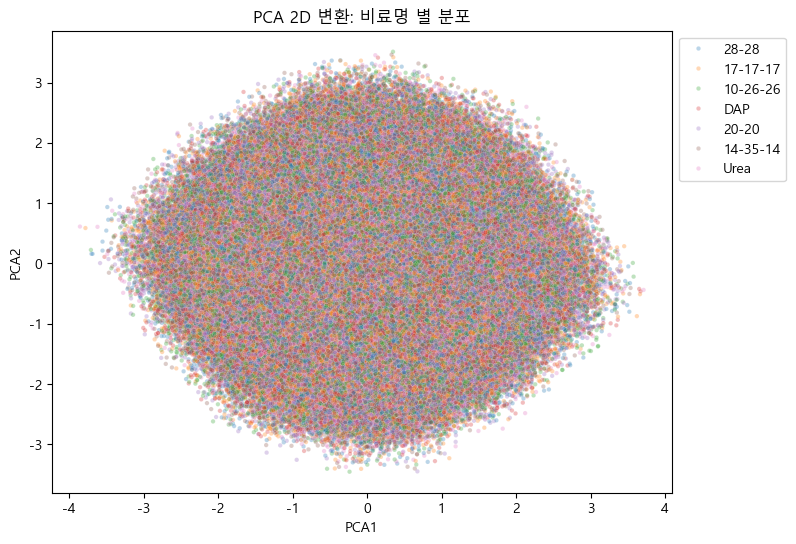

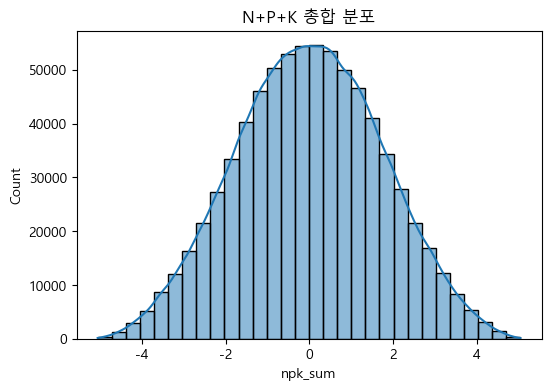

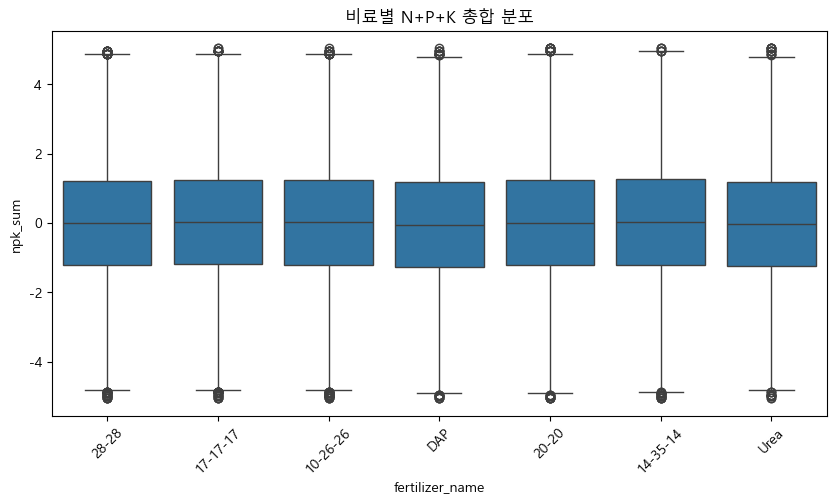

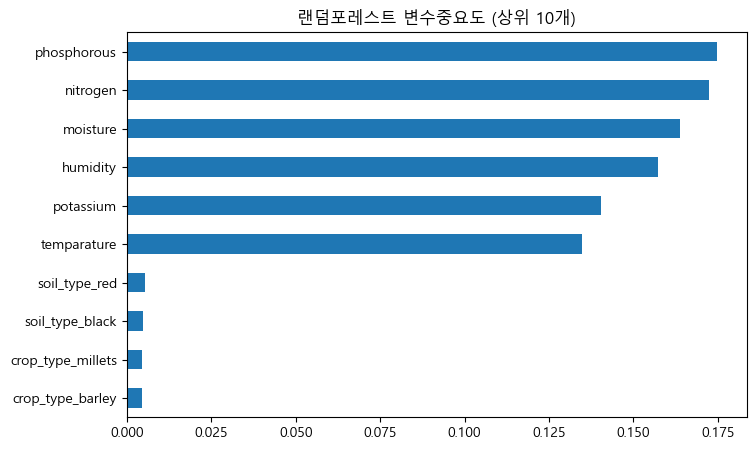

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

# 한글 폰트 경고 방지 (Windows 기준)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

train_path = 'C:/000_SHCHOI/001_SeSAC/000_Offline/000_Data AI Developer/002_Portfolio(git)/004_Kaggle/002_Predicting Optimal Fertilizers/002_Data Science/1st(250625)_ChatGPT/train_01.csv'
df = pd.read_csv(train_path)

# 컬럼명 표준화
df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]

# 1. 기초 분포
num_cols = ['temparature', 'humidity', 'moisture', 'nitrogen', 'potassium', 'phosphorous']

# 1-1. 수치형 변수 히스토그램
plt.figure(figsize = (16, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(x=df[col], bins=30, kde=True)
    plt.title(f"{col} 분포")
plt.tight_layout()
plt.show()

# 1-2. 수치형 변수 박스플롯
plt.figure(figsize = (16, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f"{col} 박스플롯")
plt.tight_layout()
plt.show()

# 1-3. 타겟(비료명) 카운트플롯
plt.figure(figsize=(8, 4))
sns.countplot(x='fertilizer_name', data=df, order=df['fertilizer_name'].value_counts().index)
plt.title("비료명(타겟) 분포")
plt.xticks(rotation=45)
plt.show()

# 2. 타겟별 변수 분포 (박스플롯, 바이올린플롯)
plt.figure(figsize=(16, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='fertilizer_name', y=col, data=df)
    plt.title(f"{col} by fertilizer")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.violinplot(x='fertilizer_name', y=col, data=df, inner='quartile')
    plt.title(f"{col} by fertilizer")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. 변수간 상관계수 히트맵
plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("수치형 변수 상관관계")
plt.show()

# 3-2. 페어플롯 (표본 1000개만 사용)
sns.pairplot(df.sample(1000, random_state=1), hue='fertilizer_name', vars=num_cols, diag_kind='kde')
plt.suptitle("수치형 변수 페어플롯", y=1.02)
plt.show()

# 4. Soil Type과 비료명 교차분석
soil_cols = [c for c in df.columns if c.startswith('soil_type_')]
soil_long = df[soil_cols + ['fertilizer_name']].melt(id_vars='fertilizer_name', var_name='soil_type', value_name='value')
soil_long = soil_long[soil_long['value'] == 1]
plt.figure(figsize=(10, 5))
sns.countplot(x='soil_type', hue='fertilizer_name', data=soil_long)
plt.title('토양별 비료명 분포')
plt.xticks(rotation=45)
plt.show()

# 4-2. Crop Type과 비료명 교차분석
crop_cols = [c for c in df.columns if c.startswith('crop_type_')]
crop_long = df[crop_cols + ['fertilizer_name']].melt(id_vars='fertilizer_name', var_name='crop_type', value_name='value')
crop_long = crop_long[crop_long['value'] == 1]
plt.figure(figsize=(14, 6))
sns.countplot(x='crop_type', hue='fertilizer_name', data=crop_long)
plt.title('작물별 비료명 분포')
plt.xticks(rotation=45)
plt.show()

# 5. 다변량: PCA 2D 시각화 (수치형+원-핫)
X_data = df.drop('fertilizer_name', axis=1)

for col in X_data.select_dtypes(include=['object']).columns:
    X_data[col] = X_data[col].astype('category').cat.codes

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_data)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['fertilizer_name'], alpha=0.3, s=10, palette='tab10')
plt.title("PCA 2D 변환: 비료명 별 분포")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

# 6. 파생변수 효과 (N+P+K 총합 분포, 비료별 boxplot)
df['npk_sum'] = df['nitrogen'] + df['potassium'] + df['phosphorous']
plt.figure(figsize=(6, 4))
sns.histplot(x=df['npk_sum'], bins=30, kde=True)
plt.title("N+P+K 총합 분포")
plt.show()
plt.figure(figsize=(10, 5))
sns.boxplot(x='fertilizer_name', y='npk_sum', data=df)
plt.title("비료별 N+P+K 총합 분포")
plt.xticks(rotation=45)
plt.show()

# 8. 변수중요도 (랜덤포레스트)
rf = RandomForestClassifier(n_estimators=20, random_state=0)
rf.fit(X_data, df['fertilizer_name'])
importances = pd.Series(rf.feature_importances_, index=X_data.columns)
importances.nlargest(10).sort_values().plot(kind='barh', figsize=(8,5))
plt.title("랜덤포레스트 변수중요도 (상위 10개)")
plt.show()

In [ ]:
# test.csv 파일을 train_01.csv 파일과 동일한 방식을 적용하여 데이터 전처리 진행.
import pandas as pd

# 파일 불러오기
train = pd.read_csv('C:/000_SHCHOI/001_SeSAC/000_Offline/000_Data AI Developer/002_Portfolio(git)/004_Kaggle/002_Predicting Optimal Fertilizers/002_Data Science/1st(250625)_ChatGPT/train_01.csv')
test = pd.read_csv('C:/000_SHCHOI/001_SeSAC/000_Offline/000_Data AI Developer/002_Portfolio(git)/004_Kaggle/002_Predicting Optimal Fertilizers/001_Dataset/test.csv')

# 1. 컬럼명 표준화
test.columns = [c.strip().lower().replace(' ', '_') for c in test.columns]

# 2. 파생변수 생성
test['npk_sum'] = test['nitrogen'] + test['potassium'] + test['phosphorous']

# 3. train과 동일한 컬럼 리스트(타겟 제외)
train_cols = [c for c in train.columns if c != 'fertilizer_name']

# 4. 누락 컬럼(원-핫 인코딩 등) 보정
for c in train_cols:
    if c not in test.columns:
        test[c] = 0

# 5. 컬럼 순서 train과 동일하게
test = test[train_cols]

# 6. 데이터 타입 일치
for c in test.columns:
    if c in train.columns:
        test[c] = test[c].astype(train[c].dtype)

# 파일 저장 과정은 생략.